# Prediction of Aluminium rod physical properties

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv("aluminum_wire_rod_dataset.csv")  #Make sure you have uploaded your dataset in the colab files
x = dataset.iloc[: , :-3].values
y = dataset.iloc[: , -3:].values

##Spliting the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100 , random_state = 0)
regressor.fit(x , y)

RandomForestRegressor(random_state=0)

##Taking the user input

In [ ]:
print("Enter the following parameter-->")
Al =float(input("Enter the Al %: "))
Si = float(input("Enter the Si %: "))
Fe = float(input("Enter the Fe %: "))
CT = float(input("Enter the casting temperature (in degree) :"))
CWT = float(input("Enter Cooling Water temperature (in degree) :"))
CS = float(input("Enter r Cast Bar Entry Temperature (in degree) :"))
ET = float(input("Enter Emulsion Temperature (in degree) :"))
EP = float(input("Enter Casting Speed (m/min) :"))
CBET = float(input("EnteEmulsion Pressure (bar):"))
EC = float(input("Enter Emulsion Concentration (%) :"))
QWP = float(input("Enter Quench Water Pressure (bar) :"))


Enter the Al %: 99
Enter the Si %: 0.132
Enter the Fe %: 0.25
Enter the casting temperature (in degree) :710
Enter Cooling Water temperature (in degree) :31
Enter Casting Speed (m/min) :6
Enter Cast Bar Entry Temperature (in degree) :452
Enter Emulsion Temperature (in degree) :45.38
Enter Emulsion Pressure (bar):2.72
Enter Emulsion Concentration (%) :6
Enter Quench Water Pressure (bar) :3.37


##Predicting on the test data

In [ ]:
y_pred = regressor.predict(x_test)

##Predicting on the user input

In [ ]:
prediction = regressor.predict([[Al , Si , Fe , CT , CWT , CS , CBET , ET , EP , EC , QWP]])
uts, elongation, conductivity = prediction[0]
print(f"Predicted UTS: {uts} MPa")
print(f"Predicted Elongation: {elongation} %")
print(f"Predicted Conductivity: {conductivity} % IACS")

Predicted UTS: 188.62305858825945 MPa
Predicted Elongation: 13.939367815205923 %
Predicted Conductivity: 60.065326394066204 % IACS


##Calculating the r2 score

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.8596412232954324


##Visualizing the model

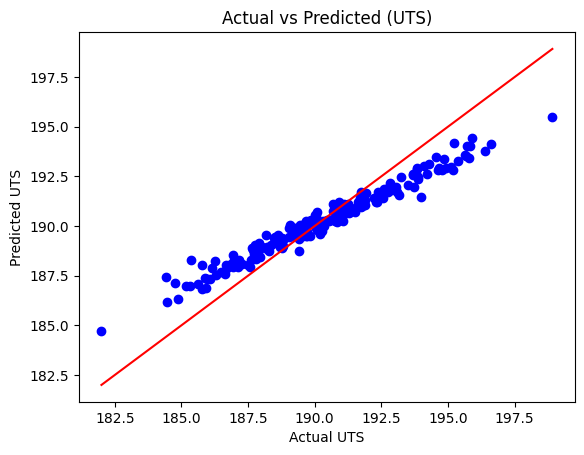

In [ ]:
plt.scatter(y_test[:, 0], y_pred[:, 0], color='blue')
plt.plot([min(y_test[:, 0]), max(y_test[:, 0])], [min(y_test[:, 0]), max(y_test[:, 0])], color='red')
plt.title('Actual vs Predicted (UTS)')
plt.xlabel('Actual UTS')
plt.ylabel('Predicted UTS')
plt.show()